In [15]:
import numpy as np
import pandas as pd

import os
#os.sys.path
import sys
sys.path.append('../src')

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
#import src.code1_data as go
#https://pypi.org/project/tensorflow/ 2.5.0

In [16]:
import json
from keras.models import model_from_json

In [17]:
from PIL import Image

In [20]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [31]:
img = cv2.imread('../imgs/Snapseed.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-k95y01np/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [25]:
gray

array([[191, 191, 191, ..., 235, 235, 235],
       [191, 191, 191, ..., 235, 235, 235],
       [191, 191, 191, ..., 235, 235, 235],
       ...,
       [140, 139, 139, ...,  88,  88,  87],
       [140, 141, 141, ...,  89,  87,  86],
       [139, 141, 141, ...,  89,  87,  86]], dtype=uint8)

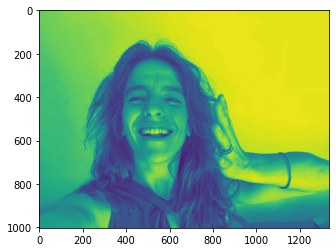

In [30]:
plt.imshow(gray)

In [32]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-k95y01np/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [33]:
picpath = '../imgs/Snapseed.jpg'
input_img=cv2.imread(picpath)
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(input_img, 1.25, 6)

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-k95y01np/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'
